<a href="https://colab.research.google.com/github/Husbe/Satellite-Building-Segmentation/blob/main/map_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install datasets
%pip install fastparquet

# Prepare the data
* load data from huggingface
* preprocessing

In [ ]:
from fastparquet import ParquetFile
from datasets import load_dataset
import pandas as pd
import datetime

In [ ]:
import sys
sys.path.append("../src")


In [ ]:
from fastai.vision.all import *
import numpy as np, matplotlib.pyplot as plt

In [ ]:
# Downloads dataset directly from huggingface
dataset = load_dataset("sjyhne/mapai_training_data")
dataset

In [ ]:
# I have the data in "dataset"
train = dataset['train']
val = dataset['validation']


In [ ]:
print(train[1])

{'image': '../../data/train/images/6051_690_84.tif', 'lidar': '../../data/train/lidar/6051_690_84.tif', 'mask': '../../data/train/masks/6051_690_84.tif'}


In [ ]:
# Convert to Dict - then dataframe
train_data = {'image': train['image'], 'lidar': train['lidar'], 'mask': train['mask'], 'is_val':False}
val_data = {'image': train['image'], 'lidar': train['lidar'], 'mask': train['mask'], 'is_val':True}

train_df = pd.DataFrame.from_dict(train_data)
val_df = pd.DataFrame.from_dict(val_data)

In [ ]:
#inspect data
val_df.tail()

In [ ]:
# How many pixels of the mask image are "active?"
im1 = val_df['mask'][2]
img = Image.open('/data/train/images/6179_494_6.tif')
img.show()

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd drive

/content/drive


In [ ]:
# Source of the data:
#   https://huggingface.co/datasets/sjyhne/mapai_training_data/tree/main

# Load the Parquet file
path = '/content/drive/MyDrive/map_AI/'
file = ['train.parquet', 'val.parquet']
train_path = path + file[0]
val_path = path + file[1]



In [ ]:
# Session crashed due to out of memory
train_df = pd.read_parquet(train_path, engine='pyarrow')

In [ ]:
# i Can load the validation data
val_df = pd.read_parquet(val_path, engine='pyarrow')


In [ ]:
# Select sample image and mask to inspect
img_fn = val_df['image'][4]
msk_sh = val_df['mask'][4]
lid_fn = val_df['lidar'][4]

In [ ]:
print(type(img_fn))

<class 'numpy.ndarray'>


In [ ]:
# 500,500, x3 is because its RGB ofc...

# Reshape images
array = np.reshape(img_fn, (500,500, 3))
get_msk = np.reshape(msk_sh, (500,500))
lid_sh = np.reshape(lid_fn, (500,500))


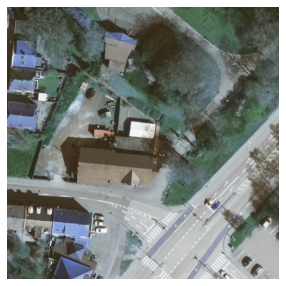

In [ ]:
# Look at the Data
# Sattelie
img = PILImage.create(array)
img.show()

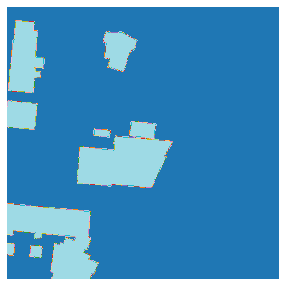

In [ ]:
# Mask
msk = PILMask.create(get_msk) 
msk.show(alpha=1)

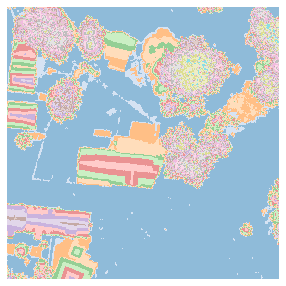

In [ ]:
# Lidar
lidar = PILMask.create(lid_sh)
lidar.show()

In [ ]:
# Inspect values in mask image
print(msk_sh)
count = np.count_nonzero(msk_sh == 1)

[0 0 0 ... 0 0 0]


In [ ]:
# Print the % of pixels that are buildings
p = (np.count_nonzero(msk_sh == 1) / msk_sh.size)
print(p)

0.155992


In [ ]:
# calculate % of pixes that are masks - for every image
percent_building = []
is_building = []

for msk in val_df['mask']:
  p = (np.count_nonzero(msk == 1) / msk.size)
  percent_building.append(p)
  
  if p != 0:
    myBool = 'True'
  else:
    myBool = 'False'
  is_building.append(myBool)

In [ ]:
# number of rows
print(val_df['mask'].size)

1500


In [ ]:
print(type(percent_building))

<class 'list'>


In [ ]:
# Create dataframe from list variables
df_b = pd.DataFrame(is_building)
df_m = pd.DataFrame(percent_building)

In [ ]:
df_c = pd.concat([df_b, df_m], axis=1)
df_c.columns = ['is_building', 'percent_building']

In [ ]:
# combine with validation data
val_df = pd.concat([val_df, df_c], axis=1)


In [ ]:
print(val_df.head(8))

In [ ]:
# Print settings
# np.set_printoptions(threshold=20)
# if you want to print the entire array:
# set threshold=np.inf 
# help(np.set_printoptions)

In [ ]:
val_df.columns

Index(['filename', 'image', 'lidar', 'mask', 'shape', 'is_building',
       'percent_building'],
      dtype='object')

In [ ]:
# Time to train a network ?
# to clean data 

# need a network - 
# a target - is_building
# 

In [ ]:
import torch
from torch.utils.data import DataLoader

In [ ]:
# 
train_datloader = DataLoader(val_df, batch_size=64, shuffle=True)


In [ ]:
ImageDataLoaders.from_df(val_df, valid_pct=0.2, seed=42, label_col='is_building')

NameError: ignored

In [ ]:
help(get_image_files)

Help on function get_image_files in module fastai.data.transforms:

get_image_files(path, recurse=True, folders=None)
    Get image files in `path` recursively, only in `folders`, if specified.

